## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Importing and Analysis data

In [2]:
car = pd.read_csv("car data.csv")

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

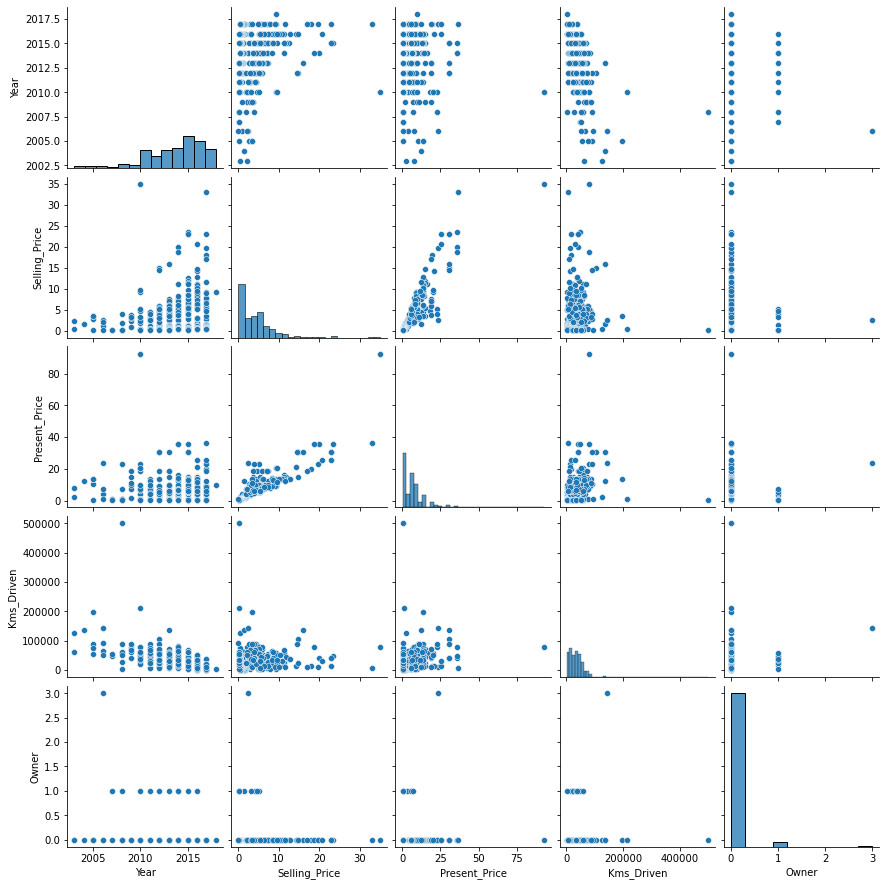

In [8]:
sns.pairplot(car)

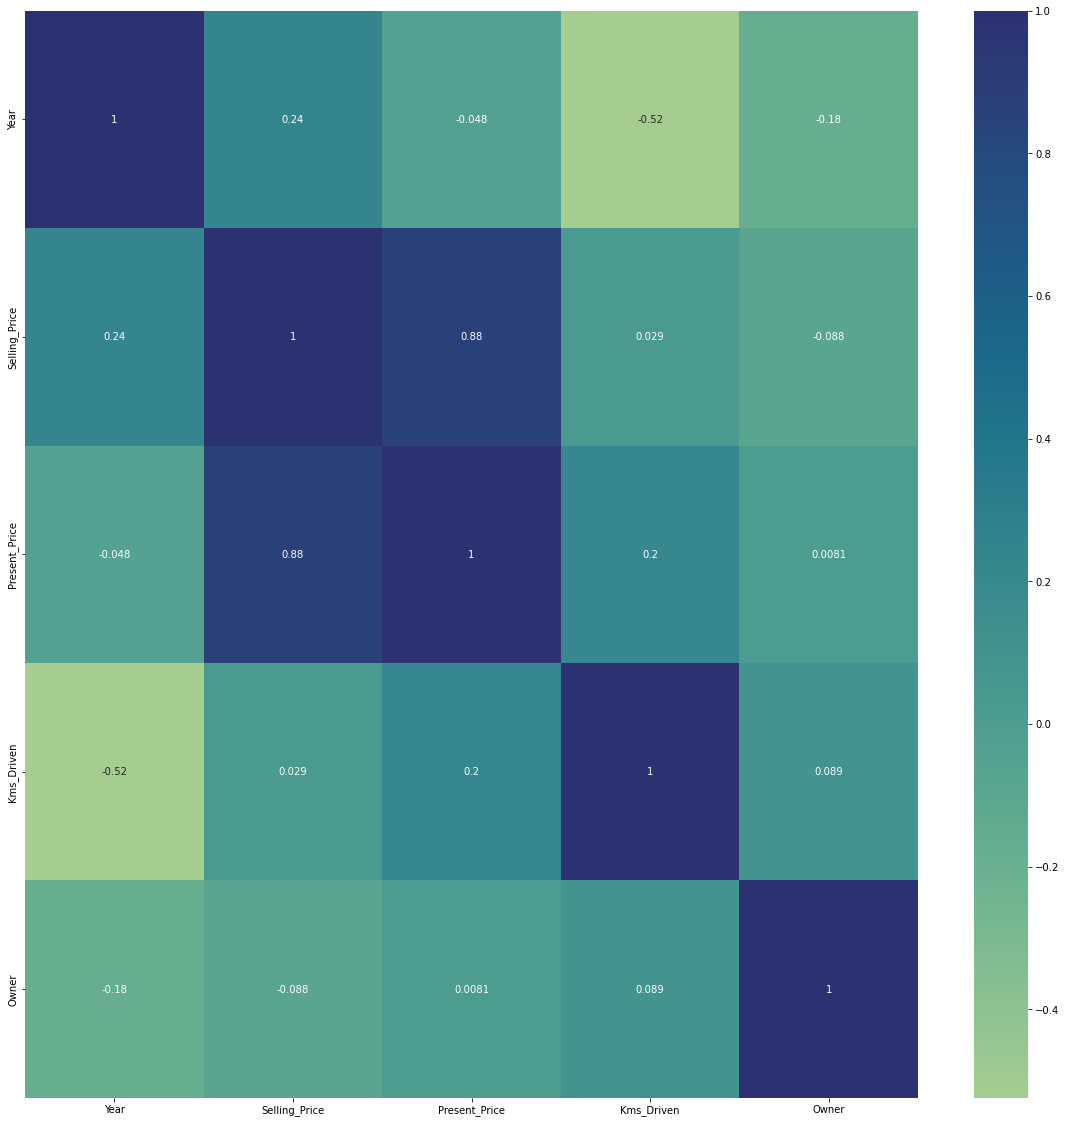

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = car.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(car[top_corr_features].corr(),annot=True,cmap="crest")

## Encoding the Categorical data

In [10]:
# checking the distribution of categorical data
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the data and Target

In [13]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)
Y = car['Selling_Price']

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 2)

### Feature Importance

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.0763074  0.39814562 0.03948718 0.15102811 0.24536631 0.08893189
 0.00073349]


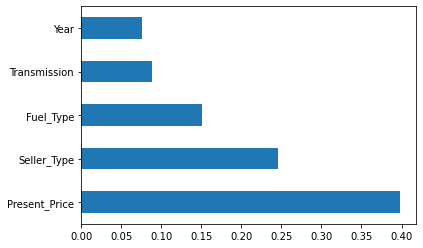

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Model Training

### Linear Regression

In [53]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [54]:
test_data_prediction = lr.predict(X_test)

In [55]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715025409


### Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [65]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [66]:
test_data = dtr.predict(X_test)

In [67]:
error_score = metrics.r2_score(Y_test, test_data)
print("R squared Error : ", error_score)

R squared Error :  0.9526468756073679


## Save Model

In [68]:
import pickle
filename = 'priceCar.sav'
pickle.dump(dtr, open(filename, 'wb'))